In [227]:
# importing the packages
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


import scipy.stats as stats

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions

In [228]:
file_path = 'C://projects/case studys py/case study 3/Case Study 3 - Insurance Claims Case Study//'

In [229]:
claims = pd.read_csv(file_path + 'claims.csv')
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [230]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [231]:
claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [232]:
claims.duplicated().sum()

0

In [233]:
cust = pd.read_csv(file_path + 'cust.csv')
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [234]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [235]:
cust.isnull().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

In [236]:
cust.duplicated().sum()

0

In [237]:
cust.rename(columns={'CUST_ID':'customer_id'},inplace=True)

In [238]:
combo_df = pd.merge(left=claims,right=cust,left_on=['customer_id'],right_on=['customer_id'],how ='inner')
combo_df.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver


In [239]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [240]:
# Handling missing data
combo_df = combo_df.dropna()

# Handling duplicated data
combo_df = combo_df.drop_duplicates()

combo_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1011 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1011 non-null   int64  
 1   customer_id          1011 non-null   int64  
 2   incident_cause       1011 non-null   object 
 3   claim_date           1011 non-null   object 
 4   claim_area           1011 non-null   object 
 5   police_report        1011 non-null   object 
 6   claim_type           1011 non-null   object 
 7   claim_amount         1011 non-null   object 
 8   total_policy_claims  1011 non-null   float64
 9   fraudulent           1011 non-null   object 
 10  gender               1011 non-null   object 
 11  DateOfBirth          1011 non-null   object 
 12  State                1011 non-null   object 
 13  Contact              1011 non-null   object 
 14  Segment              1011 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory 

## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [241]:
combo_df['claim_date'] = pd.to_datetime(combo_df['claim_date'],format='%m/%d/%Y')
combo_df['DateOfBirth'] = pd.to_datetime(combo_df['DateOfBirth'],format='%d-%b-%y')
combo_df.loc[(combo_df.DateOfBirth.dt.year > 2018),"DateOfBirth"]=combo_df[combo_df.DateOfBirth.dt.year > 2018]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))



In [242]:
combo_df.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [243]:
combo_df['claim_amount'] = pd.to_numeric(combo_df['claim_amount'].str.replace('$',''),downcast='float')

In [244]:
combo_df['claim_amount'].dtypes

dtype('float32')

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [245]:
combo_df['flag'] = np.where(combo_df['police_report']=='Yes',1,
                           np.where(combo_df['police_report'] =='No',0,'nan'))

# yes = 1, No = 0, Unknown = nan

In [246]:
combo_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,nan
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver,0


###  5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved.  However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column  

In [247]:
combo_df.sort_values(by='claim_date',ascending=False,inplace=True)
combo_df.drop_duplicates(subset=['customer_id'],keep ='last',inplace=True)


## 6. Check for missing values and impute the missing values with an appropriate value.
(mean for continuous and mode for categorical)

In [248]:
combo_df.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
flag                   0
dtype: int64

In [249]:
combo_df.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
flag                           object
dtype: object

In [250]:
continue_vars = ['claim_amount', 'total_policy_claims']

for var in continue_vars:
    combo_df[var].fillna(combo_df[var].mean(),inplace=True)

In [251]:
combo_df.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
flag                   0
dtype: int64

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18

Youth 18-30

Adult 30-60

Senior > 60


In [252]:
combo_df['age']  =   combo_df['claim_date'].dt.year - combo_df['DateOfBirth'].dt.year

In [253]:
def age_group (age):
    if age < 18:
        return 'Children'
    elif age < 30:
        return 'Youth'
    elif age <= 60 :
        return 'Adult'
    
    else :
        return 'Senior'
    
combo_df['age_group'] = combo_df['age'].apply(age_group)

In [254]:
combo_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,age_group
697,32178193,86491727,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,Female,1997-01-29,IL,294-187-3286,Gold,nan,21,Youth
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,Male,1968-04-22,FL,673-574-7823,Gold,0,50,Adult
238,52377605,40480522,Driver error,2018-10-30,Auto,Unknown,Material and injury,26310.0,1.0,No,Female,1984-05-30,NV,739-259-6835,Gold,nan,34,Adult
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08,ME,134-785-1687,Gold,0,51,Adult
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,1964-04-22,VA,286-128-6132,Platinum,0,54,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,Male,1975-11-23,NC,651-379-2486,Silver,0,42,Adult
581,97666948,97514724,Driver error,2017-01-01,Home,No,Injury only,19120.0,1.0,No,Male,1969-06-08,FL,641-684-7986,Platinum,0,48,Adult
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,Female,1993-08-13,TN,396-973-2531,Gold,0,24,Youth
231,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,Female,1999-08-05,NH,649-592-8793,Platinum,0,18,Youth


# 8. What is the average amount claimed by the customers from various segments?

In [255]:
combo_df.groupby(['Segment'])[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12643.390625
Platinum,12426.603516
Silver,12283.628906


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018

In [256]:
# 20 days prior to 1 october 2018 is 
dt.datetime(2018,10,1)-dt.timedelta(days=20)

datetime.datetime(2018, 9, 11, 0, 0)

In [257]:
combo_df[combo_df['claim_date'] < '2018-9-11'].groupby(['incident_cause'])[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,662110.0
Driver error,3112550.0
Natural causes,1181651.5
Other causes,3486969.0
Other driver error,3053360.0


In [258]:
#OR    
print('total amount claimed bases on incident cause ',
      (combo_df[combo_df['claim_date'] < '2018-9-11'].groupby(['incident_cause'])[['claim_amount']].sum()).sum())

total amount claimed bases on incident cause  claim_amount    11496640.0
dtype: float32


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [259]:
adults_claim=combo_df.loc[(combo_df['incident_cause'].str.lower().str.contains("driver") ) 
             & (combo_df['age_group'] == 'Adult') &
            (combo_df.State == "TX") | (combo_df.State == "DE") | 
             (combo_df.State == "AK") ,:].groupby(['State'])[['age_group']].count()
adults_claim

,age_group
State,
AK,16
DE,27
TX,7


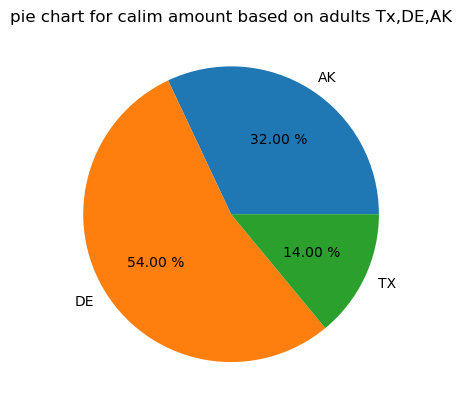

In [260]:
plt.pie(x = adults_claim.age_group,labels=adults_claim.index,autopct='%0.2f %%')
plt.title('pie chart for calim amount based on adults Tx,DE,AK')
plt.show()

### 11. Draw a pie chart between the aggregated value of claim amount based  on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [261]:
c_f =combo_df.groupby(['gender','Segment'])[['claim_amount']].sum()
c_f

claim_amount
gender Segment               
Female Gold         1937899.0
       Platinum     2278700.0
       Silver       1736202.0
Male   Gold         2398784.0
       Platinum     1996051.5
       Silver       2157708.5

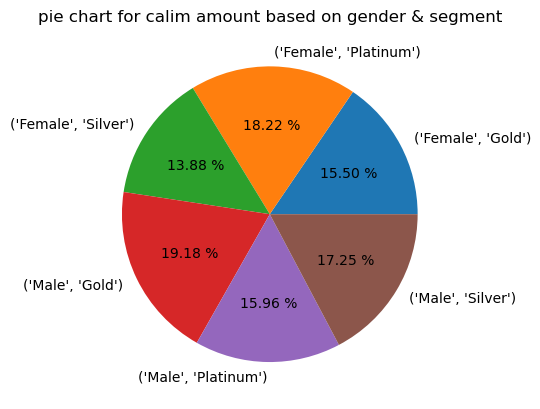

In [262]:
plt.pie(x = c_f.claim_amount,labels=c_f.index,autopct='%0.2f %%')
plt.title('pie chart for calim amount based on gender & segment')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a  bar chart

In [263]:
b_f=combo_df[combo_df['incident_cause'].str.lower().str.contains('driver')].groupby(['gender'])[['gender']].count().add_prefix('count_of_')
b_f

,count_of_gender
gender,
Female,204
Male,261


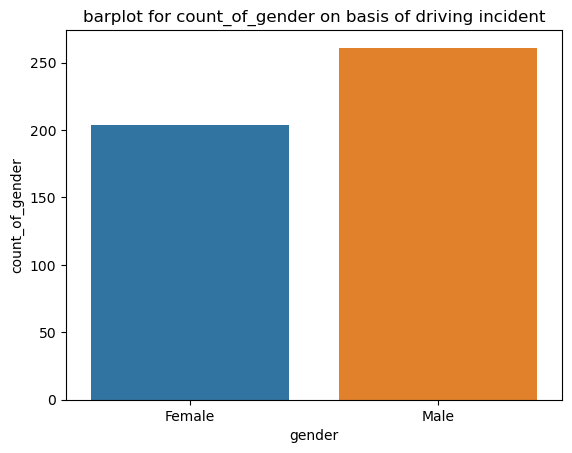

In [264]:
sns.barplot(data=b_f,x=b_f.index,y=b_f.count_of_gender)
plt.title('barplot for count_of_gender on basis of driving incident')
plt.show()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [265]:
a_f = combo_df[combo_df['fraudulent'] == 'Yes'].groupby(['age_group'])[['fraudulent']].count()
a_f

,fraudulent
age_group,
Adult,163
Youth,67


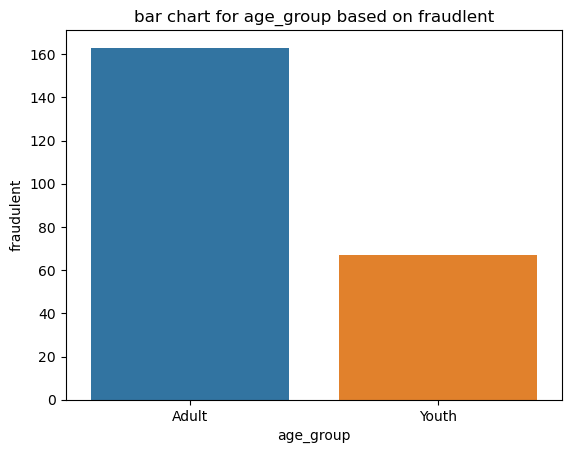

In [266]:
sns.barplot(data=a_f,x=a_f.index,y=a_f.fraudulent)
plt.title('bar chart for age_group based on fraudlent')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed  by the customers. Ensure that on the “month” axis, the month is in a  chronological order not alphabetical order

In [267]:
m_c = combo_df.groupby([combo_df['claim_date'].dt.month_name(),combo_df['claim_date'].dt.month])[['claim_amount']].sum().sort_index(level=1)
m_c.index = m_c.index.droplevel(1)
m_c

,claim_amount
claim_date,
January,1243588.5
February,1064645.0
March,1237921.5
April,1250190.5
May,1014447.5
June,1199830.0
July,1266800.5
August,833982.0
September,812723.0


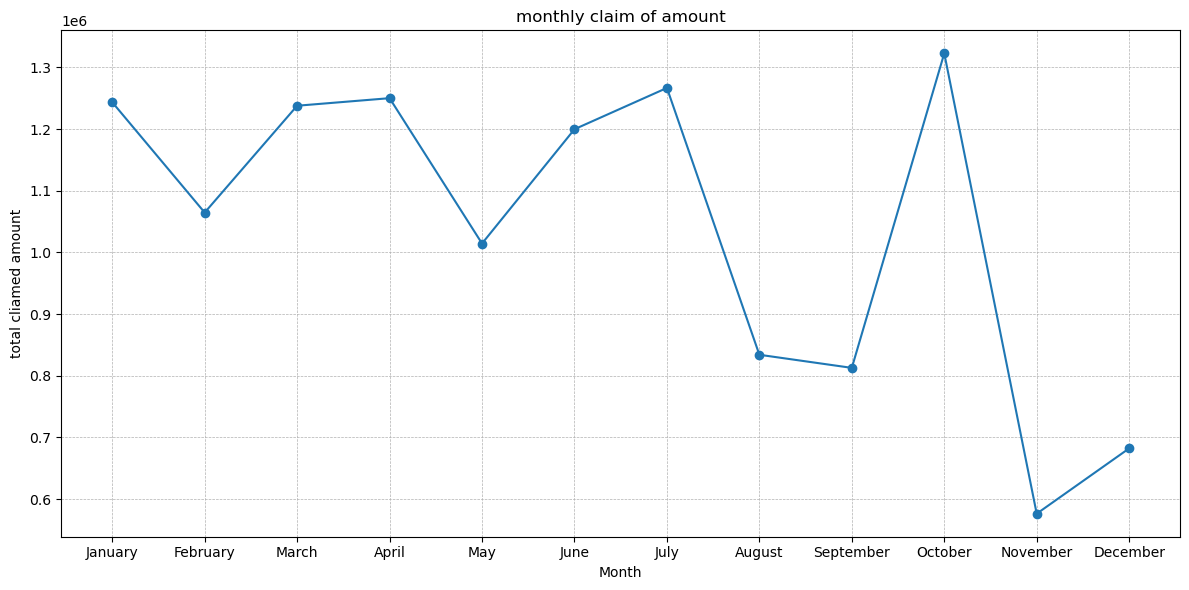

In [268]:
plt.figure(figsize=(12,6))
plt.plot(m_c,marker ='o',linestyle='-')
plt.title('monthly claim of amount')
plt.xlabel('Month')
plt.ylabel("total cliamed amount")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

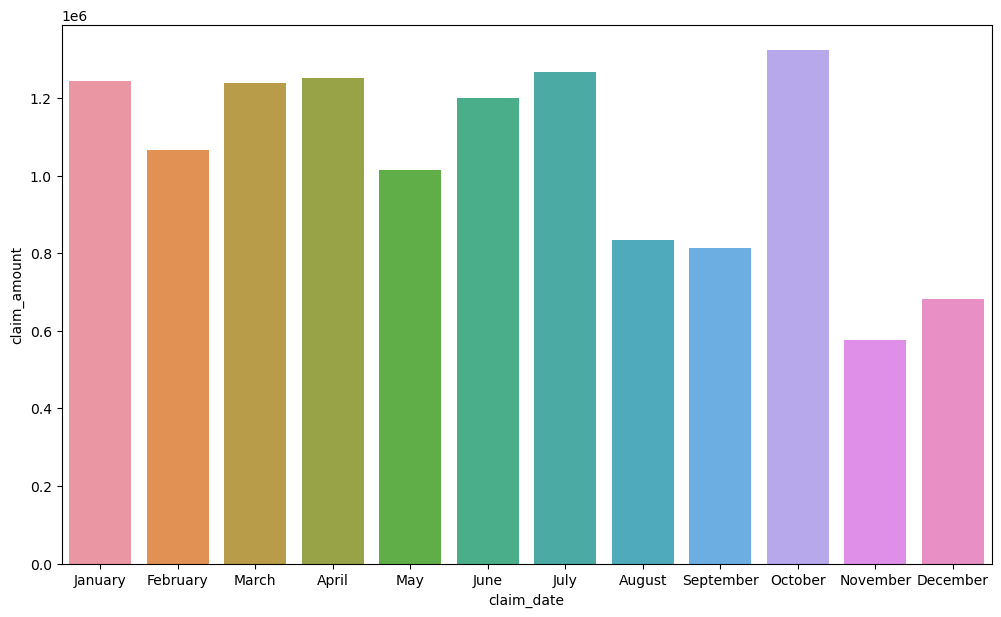

In [269]:
plt.figure(figsize=(12,7))
sns.barplot(data=m_c,x=m_c.index,y=m_c.claim_amount)
plt.show() 

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [270]:
g_a_f= combo_df.groupby(['gender','age_group','fraudulent'])[['claim_amount']].mean().reset_index()
g_a_f

,gender,age_group,fraudulent,claim_amount
0,Female,Adult,No,12364.829102
1,Female,Adult,Yes,12461.482422
2,Female,Youth,No,12547.368164
3,Female,Youth,Yes,6990.203125
4,Male,Adult,No,12108.853516
5,Male,Adult,Yes,17294.689453
6,Male,Youth,No,12197.711914
7,Male,Youth,Yes,10530.385742


C:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


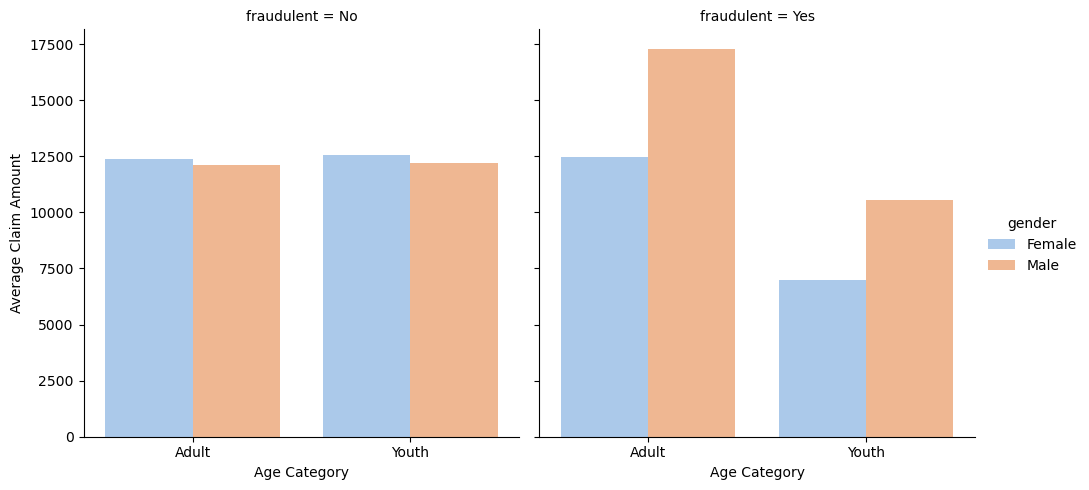

In [271]:
g =sns.catplot(
    data=g_a_f,
    x='age_group',
    y='claim_amount',
    hue='gender',
    col='fraudulent',
    kind='bar',
    palette='pastel'
)
g.set_axis_labels("Age Category", "Average Claim Amount")
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed  write-up on the parameters taken into consideration, the Hypothesis  testing steps, conclusion from the p-values and the business implications of  the statements.

## 16. Is there any similarity in the amount claimed by males and females?

In [272]:
male_claim = combo_df.loc[combo_df['gender']=='Male',['claim_amount']]
female_claim = combo_df.loc[combo_df['gender'] == 'Female',['claim_amount']]

## defining hypothesis

### H0 = amount claimed by mails = amount claimed by females
### Ha = amount claimed by mails <> amount claimed by females

### confindence intervel (CI) = 95 (0.95)
###  p_value or significance value = 5 (0.05)

In [273]:
var=stats.ttest_ind(a=male_claim,b=female_claim)
var

TtestResult(statistic=array([0.86042494], dtype=float32), pvalue=array([0.38976067], dtype=float32), df=array([1002.]))

In [274]:
p_value=var.pvalue
p_value

array([0.38976067], dtype=float32)

In [275]:
if (p_value < 0.05):
    print('we failed to reject Alternative Hypothesis (Ha) ,There is a significant difference in the amount claimed by males and females')
else:
    print('we failed to reject Null Hypothesis (H0) ,  There is no significant difference in the amount claimed by males and females. ')

we failed to reject Null Hypothesis (H0) ,  There is no significant difference in the amount claimed by males and females. 


## 17. Is there any relationship between age category and segment?


In [276]:
# defining hypothesis 

### H0 = there is no relationship between age category and segment
### H1 = There is a relationship between age category and segment.

### confindence intervel (CI) = 95 (0.95)
### alph value or error zone  = 5  (0.05)

In [277]:
observed_data = pd.crosstab(index=combo_df['age_group'],columns=combo_df['Segment'])

In [300]:
chi_test=stats.chi2_contingency(observed=observed_data)
chi_test

Chi2ContingencyResult(statistic=3.4092126973788623, pvalue=0.18184395519910643, dof=2, expected_freq=array([[240.85159363, 241.55378486, 222.59462151],
       [102.14840637, 102.44621514,  94.40537849]]))

In [301]:
chi_pvalue=chi_test.pvalue
chi_pvalue

0.18184395519910643

In [302]:
if (chi_pvalue < 0.05):
    print ('we failed to reject Alternative Hypothesis (Ha) and There is a relationship between age category and segment ')
else:
    print ('WE failed to reject Null Hypothesis (H0) and there is no relationship between age category and segment ')

WE failed to reject Null Hypothesis (H0) and there is no relationship between age category and segment 


## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [281]:
# defining hypothesis

### H0 = There is no significant rise in claim amounts for the current year compared to the 2016-17 fiscal average
### Ha = There is a significant rise in claim amounts for the current year compared to the 2016-17 fiscal average 

### confindence intervel = 95 (0.95)
### alph value or error value = 5 (0.05)

In [282]:
combo_df['claimed_year'] = combo_df['claim_date'].dt.year
year_2018 = combo_df.loc[combo_df['claimed_year'] == 2018,['claim_amount']]
year_2018

,claim_amount
697,1860.0
1055,2420.0
238,26310.0
286,42124.5
1077,2290.0
...,...
308,2240.0
561,44666.0
733,2090.0
191,31270.0


In [294]:
t_d,t_pvalue= stats.ttest_1samp(a=year_2018['claim_amount'],popmean=10000)
t_d

4.061209847847914

In [295]:
t_pvalue 
t_pvalue

5.7776096316506e-05

In [296]:
if t_pvalue < 0.05 :
    print('We failed to reject Alternative Hypothesis (Ha),There is a significant rise in claim amounts for the current year compared to the 2016-17 fiscal average')
else :
    print('We failed to reject Null Hypothesis (H0) , There is no significant rise in claim amounts for the current year compared to the 2016-17 fiscal average')

We failed to reject Alternative Hypothesis (Ha),There is a significant rise in claim amounts for the current year compared to the 2016-17 fiscal average


## 19. Is there any difference between age groups and insurance claims?

In [286]:
# definig hypothesis

### H0 = There is no statistically significant difference between age groups and insurance claims
### Ha = There is a statistically significant difference between age groups and insurance claims

### confindense intervel (CI) = 95 (0.95)
### alph value or error value  =  5 (0.05)

In [287]:
combo_df['age_group'].value_counts()

age_group
Adult    705
Youth    299
Name: count, dtype: int64

In [288]:
adult_claim = combo_df.loc[combo_df['age_group'] == 'Adult' ,['claim_amount']]
youth_claim = combo_df.loc[combo_df['age_group'] == 'Youth',['claim_amount']]

In [289]:
# Performing the t-test
t_stat, p_value_ag = stats.ttest_ind(adult_claim, youth_claim, equal_var=False)
t_stat,p_value_ag

(array([1.3344136], dtype=float32), array([0.1825907], dtype=float32))

In [290]:
p_value_ag 

array([0.1825907], dtype=float32)

In [291]:
if p_value_ag < 0 :
    print("We reject the Null Hypothesis (H0): There is a statistically significant difference between age groups and insurance claims.")
else :
    print("We fail to reject the Null Hypothesis (H0): There is no statistically significant difference between age groups and insurance claims.")

We fail to reject the Null Hypothesis (H0): There is no statistically significant difference between age groups and insurance claims.


In [292]:
combo_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,age_group,claimed_year
697,32178193,86491727,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,Female,1997-01-29,IL,294-187-3286,Gold,nan,21,Youth,2018
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,Male,1968-04-22,FL,673-574-7823,Gold,0,50,Adult,2018
238,52377605,40480522,Driver error,2018-10-30,Auto,Unknown,Material and injury,26310.0,1.0,No,Female,1984-05-30,NV,739-259-6835,Gold,nan,34,Adult,2018
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08,ME,134-785-1687,Gold,0,51,Adult,2018
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,1964-04-22,VA,286-128-6132,Platinum,0,54,Adult,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,Male,1975-11-23,NC,651-379-2486,Silver,0,42,Adult,2017
581,97666948,97514724,Driver error,2017-01-01,Home,No,Injury only,19120.0,1.0,No,Male,1969-06-08,FL,641-684-7986,Platinum,0,48,Adult,2017
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,Female,1993-08-13,TN,396-973-2531,Gold,0,24,Youth,2017
231,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,Female,1999-08-05,NH,649-592-8793,Platinum,0,18,Youth,2017


## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [304]:
correlation, p_value_corr = stats.pearsonr(combo_df['total_policy_claims'], combo_df['claim_amount'])
correlation,p_value_corr

(-0.014813838079121198, 0.639189970868238)

In [305]:
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value_corr}")

Pearson correlation coefficient: -0.014813838079121198
P-value: 0.639189970868238


In [307]:
if p_value_corr < 0.05:
    print("There is a statistically significant relationship between the total number of policy claims and the claimed amount.")
else:
    print("There is no statistically significant relationship between the total number of policy claims and the claimed amount.")

There is no statistically significant relationship between the total number of policy claims and the claimed amount.


## conclusion  :
### we got negative value
## the relation ship between total number of policy claims and the claimed amount shows the weak neagtive correlation 